In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('NBA_metrics_13_to_20.csv')

In [3]:
qualify_df = df[df.MP > 100]

In [4]:
metrics = ['PER','WS.48','RAPM','LA_RAPM','BPM','RPM','PIPM','raptor']


metric_matrix = np.zeros((len(metrics),len(metrics)))
for year in range(13,18):
    df_year_y_1 = qualify_df[qualify_df.Season == '20'+str(year)+'-'+str(year+1)]
    df_year_y_2 = qualify_df[qualify_df.Season == '20'+str(year+1)+'-'+str(year+2)]
    merge_df = pd.merge(df_year_y_1,df_year_y_2,on='PLAYER_ID').dropna()
    
    for i,metric_y_1 in enumerate(metrics):
        for j,metric_y_2 in enumerate(metrics):
            slope, intercept, r_value, p_value, std_err = stats.linregress(merge_df[metric_y_1 + '_x'], merge_df[metric_y_2 + '_y'])
            metric_matrix[i][j] =  r_value**2         


Text(32.09375, 0.5, 'Year Y')

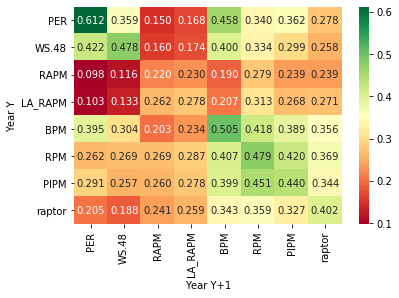

In [5]:
sns.heatmap(metric_matrix, annot=True, fmt="1.3f", xticklabels=metrics, yticklabels=metrics,cmap='RdYlGn')
plt.xlabel('Year Y+1')
plt.ylabel('Year Y')